In [ ]:
#Supervised Learning Guided Lesson

In [3]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
pd.options.display.float_format = '{:.4f}'.format

In [5]:
kickstarter = pd.read_csv('ks-projects-201801.csv')

In [6]:
kickstarter.shape

(378661, 15)

In [7]:
kickstarter.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [9]:
kickstarter.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0000,2015-08-11 12:12:28,0.0000,failed,0,GB,0.0000,0.0000,1533.9500
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0000,2017-09-02 04:43:57,2421.0000,failed,15,US,100.0000,2421.0000,30000.0000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0000,2013-01-12 00:20:50,220.0000,failed,3,US,220.0000,220.0000,45000.0000
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0000,2012-03-17 03:24:11,1.0000,failed,1,US,1.0000,1.0000,5000.0000
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0000,2015-07-04 08:35:03,1283.0000,canceled,14,US,1283.0000,1283.0000,19500.0000


In [10]:
kickstarter.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,378661.0000,378661.0000,378661.0000,378661.0000,374864.0000,378661.0000,378661.0000
mean,1074731191.9888,49080.7915,9682.9793,105.6175,7036.7289,9058.9241,45454.4015
std,619086204.3226,1183391.2591,95636.0100,907.1850,78639.7453,90973.3431,1152950.0551
min,5971.0000,0.0100,0.0000,0.0000,0.0000,0.0000,0.0100
25%,538263516.0000,2000.0000,30.0000,2.0000,16.9800,31.0000,2000.0000
50%,1075275634.0000,5200.0000,620.0000,12.0000,394.7200,624.3300,5500.0000
75%,1610148624.0000,16000.0000,4076.0000,56.0000,3034.0900,4050.0000,15500.0000
max,2147476221.0000,100000000.0000,20338986.2700,219382.0000,20338986.2700,20338986.2700,166361390.7100


In [11]:
kickstarter.state.value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [12]:
kickstarter.state.value_counts(normalize=True)

failed       0.5222
successful   0.3538
canceled     0.1024
undefined    0.0094
live         0.0074
suspended    0.0049
Name: state, dtype: float64

In [13]:
kickstarter_classify = kickstarter[kickstarter.state.isin(['failed', 'successful'])]
kickstarter_classify.state.value_counts(normalize=True)

failed       0.5961
successful   0.4039
Name: state, dtype: float64

In [14]:
kickstarter_classify.main_category.value_counts()

Film & Video    56527
Music           45949
Publishing      35445
Games           28521
Technology      27050
Art             25641
Design          25364
Food            22054
Fashion         19775
Theater         10242
Comics           9878
Photography      9689
Crafts           7818
Journalism       4149
Dance            3573
Name: main_category, dtype: int64

In [15]:
pd.crosstab(kickstarter_classify.main_category,kickstarter_classify.state)

state,failed,successful
main_category,,
Art,14131,11510
Comics,4036,5842
Crafts,5703,2115
Dance,1235,2338
Design,14814,10550
Fashion,14182,5593
Film & Video,32904,23623
Food,15969,6085
Games,16003,12518


In [16]:
category_crosstab = pd.crosstab(kickstarter_classify.main_category,kickstarter_classify.state)
category_crosstab['success_rate'] = category_crosstab.successful/(category_crosstab.successful+category_crosstab.failed)
category_crosstab

state,failed,successful,success_rate
main_category,,,
Art,14131,11510,0.4489
Comics,4036,5842,0.5914
Crafts,5703,2115,0.2705
Dance,1235,2338,0.6544
Design,14814,10550,0.4159
Fashion,14182,5593,0.2828
Film & Video,32904,23623,0.4179
Food,15969,6085,0.2759
Games,16003,12518,0.4389


In [17]:
kickstarter_classify.currency.value_counts()

USD    261511
GBP     29476
EUR     14378
CAD     12375
AUD      6621
SEK      1510
MXN      1411
NZD      1274
DKK       929
CHF       652
NOK       584
HKD       477
SGD       454
JPY        23
Name: currency, dtype: int64

In [18]:
currency_crosstab = pd.crosstab(kickstarter_classify.currency,kickstarter_classify.state)
currency_crosstab['success_rate'] = currency_crosstab.successful/(currency_crosstab.successful+currency_crosstab.failed)
currency_crosstab

state,failed,successful,success_rate
currency,,,
AUD,4610,2011,0.3037
CAD,8238,4137,0.3343
CHF,465,187,0.2868
DKK,567,362,0.3897
EUR,10496,3882,0.2700
GBP,17395,12081,0.4099
HKD,261,216,0.4528
JPY,16,7,0.3043
MXN,1015,396,0.2807


In [19]:
kickstarter_classify['launched_date'] = pd.to_datetime(kickstarter_classify.launched)
kickstarter_classify['deadline_date'] = pd.to_datetime(kickstarter_classify.deadline)
kickstarter_classify['duration'] = (kickstarter_classify.deadline_date - kickstarter_classify.launched_date).dt.days

C:\Users\gissellec\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\gissellec\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\gissellec\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

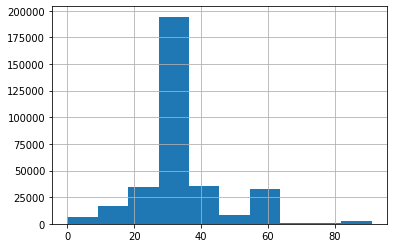

In [20]:
kickstarter_classify.duration.hist()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016CDDADAE88>,
      dtype=object)

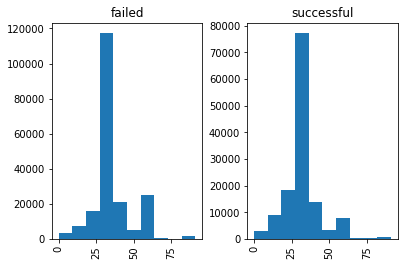

In [21]:
kickstarter_classify.duration.hist(by=kickstarter_classify.state)

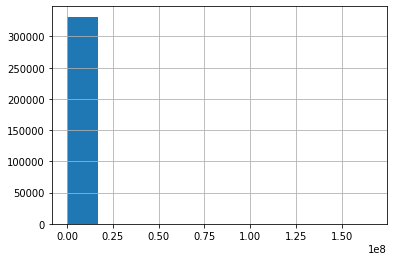

In [22]:
kickstarter_classify.usd_goal_real.hist()

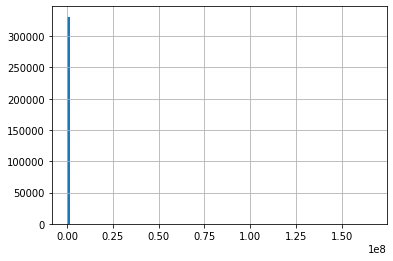

In [23]:
kickstarter_classify.usd_goal_real.hist(bins=100)

In [24]:
max(kickstarter_classify.usd_goal_real)

166361390.71

In [25]:
kickstarter_classify[kickstarter_classify.usd_goal_real > 1000000]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,launched_date,deadline_date,duration
340,1001542282,You in a novel,Publishing,Publishing,EUR,2015-11-09,1000000.0000,2015-09-10 23:03:21,10.0000,failed,1,IT,11.1800,10.7600,1076403.0900,2015-09-10 23:03:21,2015-11-09,59
971,1004941506,Maori MBT Awareness Centre,Web,Journalism,CAD,2017-10-18,2000000.0000,2017-08-19 22:13:55,2242.0000,failed,19,CA,1160.6700,1794.4600,1600768.3700,2017-08-19 22:13:55,2017-10-18,59
1042,1005237669,The Old Soul of a Lion,Film & Video,Film & Video,USD,2014-10-14,3000000.0000,2014-08-15 20:16:22,4.0000,failed,2,US,4.0000,4.0000,3000000.0000,2014-08-15 20:16:22,2014-10-14,59
1144,1005820080,The Million Pound Shirt,Fashion,Fashion,GBP,2015-11-25,1000000.0000,2015-10-21 22:00:04,10.0000,failed,1,GB,15.4700,15.0500,1505185.3600,2015-10-21 22:00:04,2015-11-25,34
1795,1009207145,** GOLIATH **,Product Design,Design,CAD,2014-07-21,3850000.0000,2014-06-21 22:34:21,285.0000,failed,5,CA,263.4100,264.6700,3575408.6200,2014-06-21 22:34:21,2014-07-21,29
2920,1015071175,Thermal Safe,Product Design,Design,USD,2015-06-10,2000000.0000,2015-04-22 03:54:47,665.0000,failed,8,US,665.0000,665.0000,2000000.0000,2015-04-22 03:54:47,2015-06-10,48
2993,1015466274,Genesis,Film & Video,Film & Video,EUR,2015-09-01,5000000.0000,2015-07-07 21:14:52,0.0000,failed,0,IT,0.0000,0.0000,5568982.9900,2015-07-07 21:14:52,2015-09-01,55
3140,1016210580,INDIRA – THE FIRST INDIAN GRAND MUSICAL,Musical,Theater,EUR,2016-04-27,15000000.0000,2016-02-27 13:08:01,15.0000,failed,6,ES,16.5900,17.1000,17104542.9700,2016-02-27 13:08:01,2016-04-27,59
3271,1016899157,Musée du cirque Gilles MAIGNANT : NICE CIRCUS ...,Performance Art,Art,EUR,2015-10-25,1000000.0000,2015-08-26 19:38:53,100.0000,failed,1,FR,115.3400,110.1700,1101697.7200,2015-08-26 19:38:53,2015-10-25,59
3293,1017011422,Electric Car,Technology,Technology,MXN,2017-09-13,40000000.0000,2017-08-19 01:19:23,510.0000,failed,2,MX,0.0000,28.8700,2263980.0800,2017-08-19 01:19:23,2017-09-13,24


In [26]:
kickstarter_classify[kickstarter_classify.usd_goal_real > 1000000].state.value_counts()


failed        829
successful     11
Name: state, dtype: int64

In [27]:
kickstarter_classify.corr()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,duration
ID,1.0000,0.0019,0.0009,0.0008,-0.0003,0.0003,0.0018,0.0028
goal,0.0019,1.0000,0.0080,0.0048,0.0064,0.0060,0.9526,0.0227
pledged,0.0009,0.0080,1.0000,0.7173,0.8580,0.9536,0.0057,0.0081
backers,0.0008,0.0048,0.7173,1.0000,0.6975,0.7523,0.0052,-0.0000
usd pledged,-0.0003,0.0064,0.8580,0.6975,1.0000,0.9077,0.0070,0.0077
usd_pledged_real,0.0003,0.0060,0.9536,0.7523,0.9077,1.0000,0.0064,0.0087
usd_goal_real,0.0018,0.9526,0.0057,0.0052,0.0070,0.0064,1.0000,0.0216
duration,0.0028,0.0227,0.0081,-0.0000,0.0077,0.0087,0.0216,1.0000


In [28]:
kickstarter_classify.isnull().sum(axis = 0)

ID                    0
name                  3
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         210
usd_pledged_real      0
usd_goal_real         0
launched_date         0
deadline_date         0
duration              0
dtype: int64

The first step is to pick only the columns that we decided to keep as well as separating the data to predictor (x) and response (y) variables. We use the get dummies function on the response variables to convert them from categorical values to a variable containing zeros and ones. We use the drop_first option to ensure that we only get one column (since for n values, the drop_first option will create n-1 variable) 

In [29]:
kickstarter_variables = kickstarter_classify[['usd_goal_real', 'backers', 'main_category', 'duration', 'currency']]
kickstarter_y = pd.get_dummies(data=kickstarter_classify['state'], drop_first=True)

In [30]:
#The next step in our data processing is to convert the categorical variables 
#to dummy variables using the get_dummies function. 
kickstarter_x = pd.get_dummies(data=kickstarter_variables, columns=['main_category', 'currency'], drop_first=True)
kickstarter_x.head()

,usd_goal_real,backers,duration,main_category_Comics,main_category_Crafts,main_category_Dance,main_category_Design,main_category_Fashion,main_category_Film & Video,main_category_Food,...,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,1533.9500,0,58,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,30000.0000,15,59,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,45000.0000,3,44,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,5000.0000,1,29,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,50000.0000,224,34,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(kickstarter_x, kickstarter_y, test_size=0.2)

In [32]:
from sklearn.linear_model import LogisticRegression

ks_model = LogisticRegression().fit(X_train, y_train)

C:\Users\gissellec\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gissellec\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
from sklearn.metrics import confusion_matrix

y_pred_test = ks_model.predict(X_test)
confusion_matrix(y_test, y_pred_test)


array([[37671,  1869],
       [ 4277, 22518]], dtype=int64)

The first entry in our matrix is the number of observations correctly classified as 0 (or failure). The second entry in the matrix are all entries incorrectly classified as 1 (or success). These observations are actually zeros but our algorithm classified them as 1. The third entry contains the count of all observations incorrectly classified as zero (or failure). The last entry contains the count of observations correctly classified as 1. Our goal is to maximize the first and last entries (the correctly classified observations) and minimize the incorrectly classified information. As we can see, out of 66335 observations, 60048 (or 90.5%) are correctly classified.

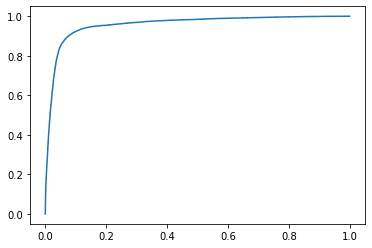

In [34]:
#We have previously looked at the ROC curve. Recall that this curve is a measure of describing how well our 
#algorithm classifies the data. The better our classification algorithm, the larger the area under the curve 
#(also known as AUC=Area Under the Curve).
from sklearn import metrics

y_pred_proba = ks_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr)

In [35]:
auc

0.9576722054513263

In [ ]:
#The area under the curve is over 0.95. This is a decent number, but perhaps we could do better 
#with a different algorithm.

Random forest is an ensemble algorithm. This means that it resamples the data multiple times and generates a decision tree from each sample. We then think of the trees as a group of algorithms. We base our decision on the outcome of the majority of algorithms in the ensemble.

In [36]:
from sklearn.ensemble import RandomForestClassifier

ks_rf = RandomForestClassifier().fit(X_train, y_train)

C:\Users\gissellec\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\gissellec\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
y_pred_test_rf = ks_rf.predict(X_test)
confusion_matrix(y_test, y_pred_test_rf)


array([[36891,  2649],
       [ 2673, 24122]], dtype=int64)

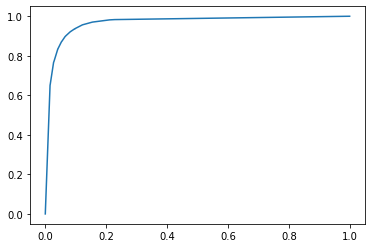

In [38]:
y_pred_proba_rf = ks_rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_rf)
auc = metrics.roc_auc_score(y_test, y_pred_proba_rf)

plt.plot(fpr,tpr)

In [39]:
auc

0.966997865356432